Name : Hitesh Sanjaysing Girase

Branch/Year : BE AI&DS ( SEM - 7TH )

Roll No : 05

DMV Practical No & Title : 6. Analyzing Sales Performance by Region in a Retail Company

In [2]:
# Step 1: Import Required Libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configure pandas display
pd.set_option('display.max_columns', None)

# Set plot style
plt.style.use('seaborn-v0_8')


In [4]:
# Load dataset 
df = pd.read_csv("C:/Users/Hitesh Girase/Downloads/customer_shopping_data.csv")


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_no      99457 non-null  object 
 1   customer_id     99457 non-null  object 
 2   gender          99457 non-null  object 
 3   age             99457 non-null  int64  
 4   category        99457 non-null  object 
 5   quantity        99457 non-null  int64  
 6   price           99457 non-null  float64
 7   payment_method  99457 non-null  object 
 8   invoice_date    99457 non-null  object 
 9   shopping_mall   99457 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 7.6+ MB


In [8]:
df.describe()

,age,quantity,price
count,99457.000000,99457.000000,99457.000000
mean,43.427089,3.003429,689.256321
std,14.990054,1.413025,941.184567
min,18.000000,1.000000,5.230000
25%,30.000000,2.000000,45.450000
50%,43.000000,3.000000,203.300000
75%,56.000000,4.000000,1200.320000
max,69.000000,5.000000,5250.000000


In [10]:
df.shape

(99457, 10)

In [12]:
df.columns

Index(['invoice_no', 'customer_id', 'gender', 'age', 'category', 'quantity',
       'price', 'payment_method', 'invoice_date', 'shopping_mall'],
      dtype='object')

In [14]:
df.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon


In [16]:
df.tail()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
99452,I219422,C441542,Female,45,Souvenir,5,58.65,Credit Card,21/09/2022,Kanyon
99453,I325143,C569580,Male,27,Food & Beverage,2,10.46,Cash,22/09/2021,Forum Istanbul
99454,I824010,C103292,Male,63,Food & Beverage,2,10.46,Debit Card,28/03/2021,Metrocity
99455,I702964,C800631,Male,56,Technology,4,4200.00,Cash,16/03/2021,Istinye Park
99456,I232867,C273973,Female,36,Souvenir,3,35.19,Credit Card,15/10/2022,Mall of Istanbul


In [18]:
# Check missing values
df.isnull().sum()


invoice_no        0
customer_id       0
gender            0
age               0
category          0
quantity          0
price             0
payment_method    0
invoice_date      0
shopping_mall     0
dtype: int64

In [20]:
# Remove duplicates
df.drop_duplicates(inplace=True)

# Replace missing numerical values with 0
df.fillna(0, inplace=True)

# Confirm changes
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_no      99457 non-null  object 
 1   customer_id     99457 non-null  object 
 2   gender          99457 non-null  object 
 3   age             99457 non-null  int64  
 4   category        99457 non-null  object 
 5   quantity        99457 non-null  int64  
 6   price           99457 non-null  float64
 7   payment_method  99457 non-null  object 
 8   invoice_date    99457 non-null  object 
 9   shopping_mall   99457 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 7.6+ MB


In [22]:
# Total number of transactions per region
region_counts = df['shopping_mall'].value_counts()
region_counts


shopping_mall
Mall of Istanbul     19943
Kanyon               19823
Metrocity            15011
Metropol AVM         10161
Istinye Park          9781
Zorlu Center          5075
Cevahir AVM           4991
Forum Istanbul        4947
Viaport Outlet        4914
Emaar Square Mall     4811
Name: count, dtype: int64

In [24]:
# Total transactions per product category
category_counts = df['category'].value_counts()
category_counts


category
Clothing           34487
Cosmetics          15097
Food & Beverage    14776
Toys               10087
Shoes              10034
Souvenir            4999
Technology          4996
Books               4981
Name: count, dtype: int64

In [26]:
# Total sales by shopping mall (region)
region_sales = df.groupby("shopping_mall")["price"].sum().sort_values(ascending=False)
region_sales

shopping_mall
Mall of Istanbul     13851737.62
Kanyon               13710755.24
Metrocity            10249980.07
Metropol AVM          6937992.99
Istinye Park          6717077.54
Zorlu Center          3509649.02
Cevahir AVM           3433671.84
Viaport Outlet        3414019.46
Emaar Square Mall     3390408.31
Forum Istanbul        3336073.82
Name: price, dtype: float64

In [28]:
# Total sales by product category
category_sales = df.groupby("category")["price"].sum().sort_values(ascending=False)
category_sales

category
Clothing           31075684.64
Shoes              18135336.89
Technology         15772050.00
Cosmetics           1848606.90
Toys                1086704.64
Food & Beverage      231568.71
Books                226977.30
Souvenir             174436.83
Name: price, dtype: float64

In [30]:
# Combined sales by region and product category
combined_sales = df.groupby(["shopping_mall", "category"])["price"].sum().unstack()
combined_sales.head()

category,Books,Clothing,Cosmetics,Food & Beverage,Shoes,Souvenir,Technology,Toys
shopping_mall,,,,,,,,
Cevahir AVM,11998.80,1554414.40,88394.84,11992.39,884050.41,8304.84,819000.0,55516.16
Emaar Square Mall,11059.50,1511803.04,92379.52,11030.07,871446.84,8515.98,834750.0,49423.36
Forum Istanbul,11453.40,1572119.12,95225.72,10836.56,875648.03,9090.75,706650.0,55050.24
Istinye Park,20725.20,3050313.20,178741.36,23419.94,1806511.70,18369.18,1509900.0,109096.96
Kanyon,44980.35,6155541.04,372242.30,45474.85,3640031.05,35483.25,3202500.0,214502.40


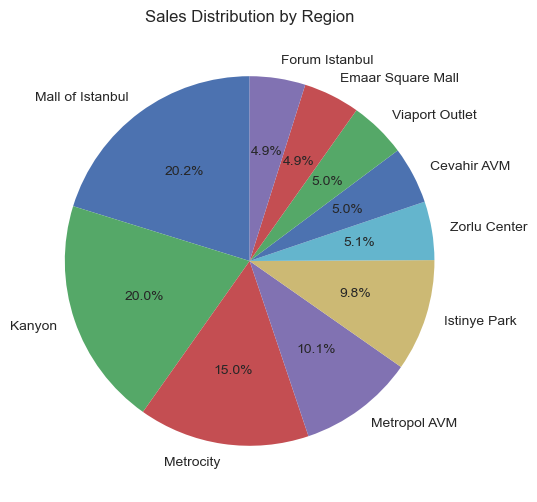

In [32]:
# Pie chart - Sales by region
plt.figure(figsize=(6,6))
plt.pie(region_sales, labels=region_sales.index, autopct='%1.1f%%', startangle=90)
plt.title("Sales Distribution by Region")
plt.show()

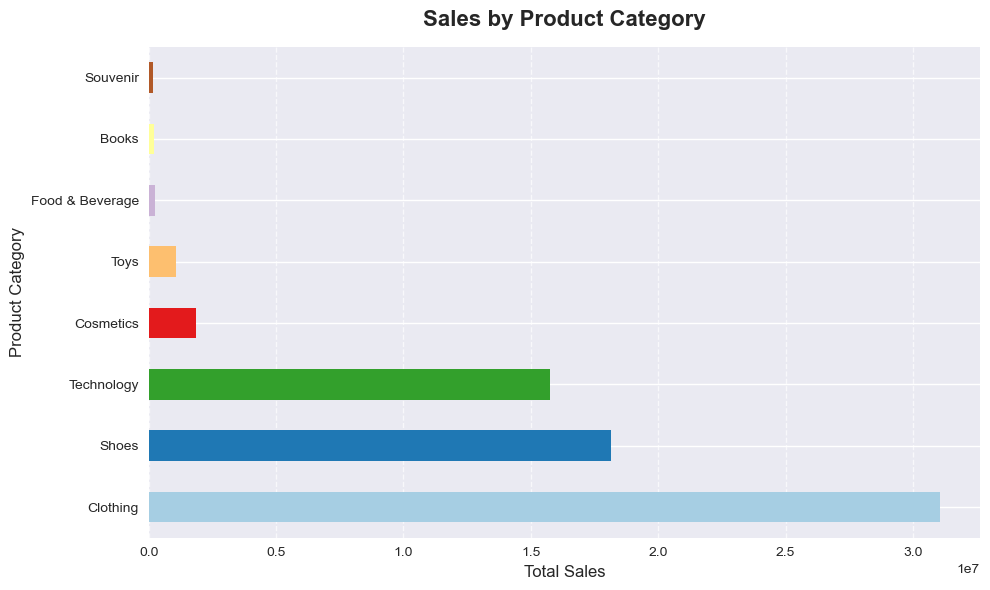

In [69]:
# Sales by Product Category - Horizontal Bar Chart

plt.figure(figsize=(10, 6))
category_sales_sorted.plot(kind='barh', color=plt.cm.Paired(np.linspace(0, 1, len(category_sales_sorted))))
plt.xlabel("Total Sales", fontsize=12)
plt.ylabel("Product Category", fontsize=12)
plt.title("Sales by Product Category", fontsize=16, fontweight='bold', pad=15)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


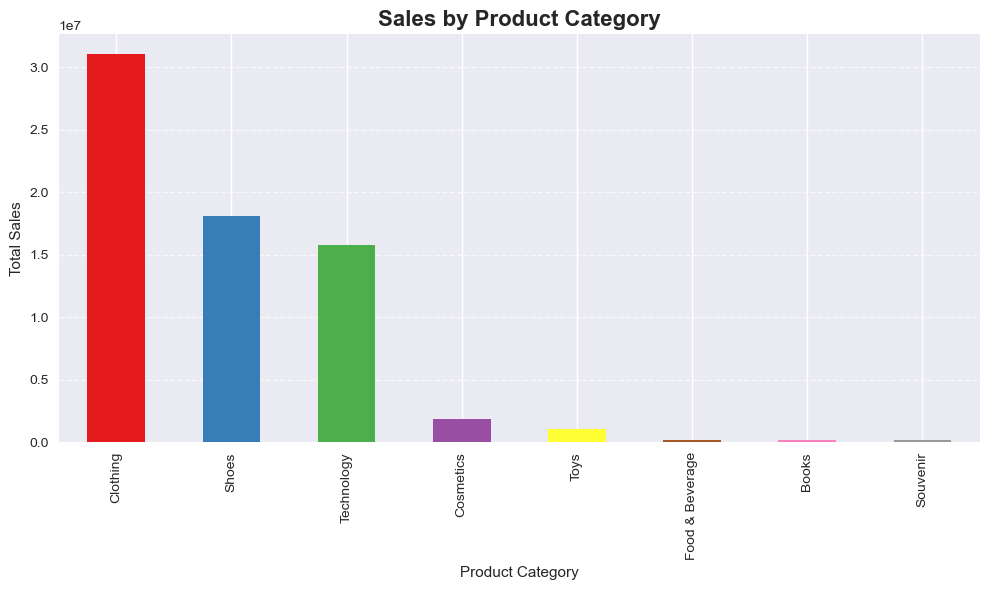

In [76]:
# Vertical Bar Chart - Sales by Product Category
plt.figure(figsize=(10, 6))
category_sales_sorted.plot(kind='bar', color=plt.cm.Set1(np.linspace(0, 1, len(category_sales_sorted))))
plt.title("Sales by Product Category", fontsize=16, fontweight='bold')
plt.xlabel("Product Category")
plt.ylabel("Total Sales")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


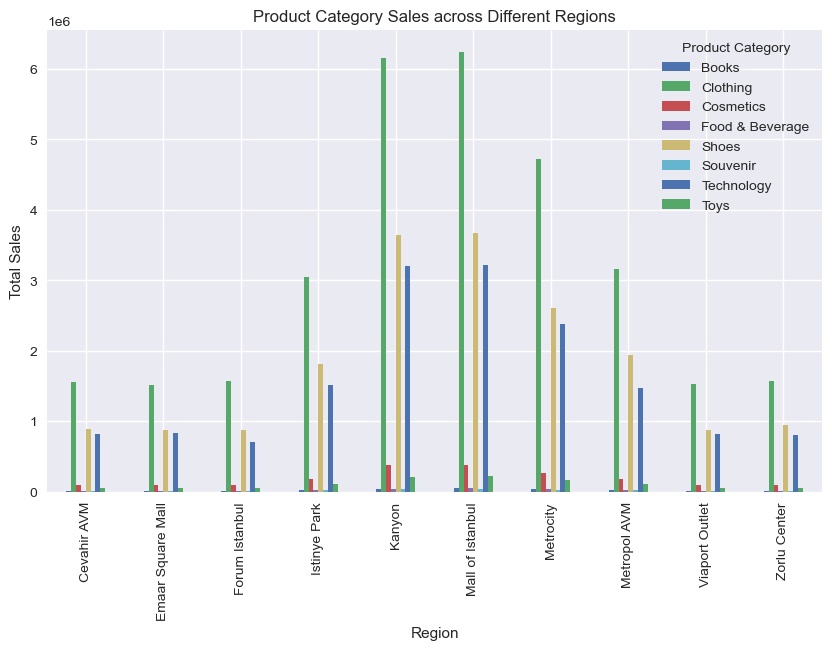

In [71]:
# Grouped bar chart - Sales by category in each region
combined_sales.plot(kind='bar', figsize=(10,6))
plt.title("Product Category Sales across Different Regions")
plt.ylabel("Total Sales")
plt.xlabel("Region")
plt.legend(title="Product Category")
plt.show()

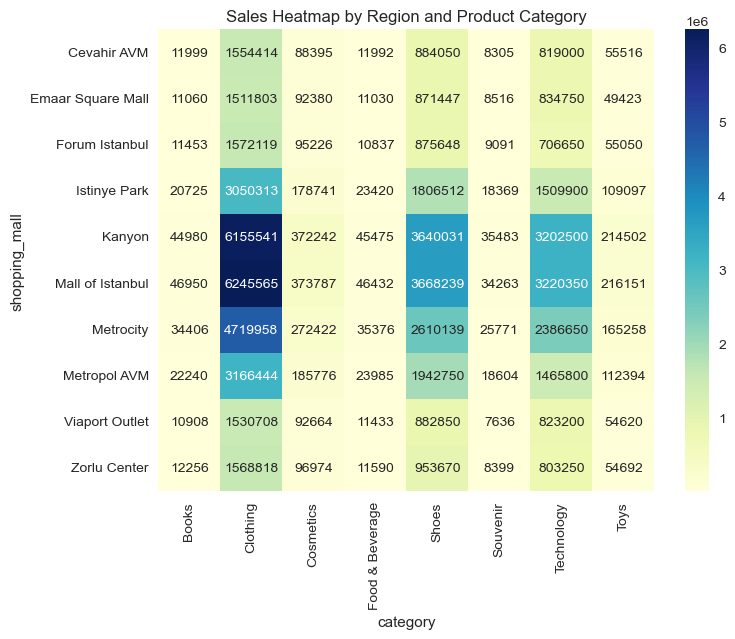

In [73]:
# Heatmap - Region vs Product Category
plt.figure(figsize=(8,6))
sns.heatmap(combined_sales, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title("Sales Heatmap by Region and Product Category")
plt.show()

Conclusion & key findings:

1) The sales data from different regions was collected, cleaned, and analyzed properly.

2) Some regions showed high sales, while a few others had low performance.

3) Clothing and Electronics were the top-selling product categories.

4) Charts and graphs helped to clearly understand sales trends across regions.

5) The analysis gives useful ideas to improve sales strategy and plan better promotions.
